### Importing Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("Dataset/diabetes_prediction_dataset.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.tail()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0
99999,Female,57.0,0,0,current,22.43,6.6,90,0


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [7]:
df.duplicated().sum()

3854

In [8]:
df.drop_duplicates(inplace = True)

In [9]:
df.duplicated().sum()

0

### Machine Learning

In [10]:
df['age_cat'] = pd.cut(df['age'], bins = [0, 18, 36, 72, np.inf], labels = [1, 2, 3, 4])
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_set, test_set in split.split(df, df['age_cat']):
    strat_train = df.iloc[train_set]
    strat_test = df.iloc[test_set]

### Copying the Training Set

In [11]:
diabetes_train = strat_train.copy()

### Separating Features and Labels

In [12]:
diabetes_features_train = diabetes_train.drop(['diabetes', 'age_cat'], axis = 1) 
diabetes_label_train = diabetes_train['diabetes']

### Separating Numerical and Categorical Values

In [13]:
diabetes_num_train = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes_cat_train = ['gender', 'smoking_history']

### Let's Make Pipelines

In [14]:
num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy = "median")),
    ("scaler", StandardScaler()),
])
cat_pipeline = Pipeline([
    ("onhot", OneHotEncoder(handle_unknown = "ignore")),
])
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, diabetes_num_train),
    ("cat", cat_pipeline, diabetes_cat_train),
])

### Transforming the Data

In [15]:
diabetes_prepared_train = full_pipeline.fit_transform(diabetes_features_train)

### Training the Models

In [16]:
logistic_model = LogisticRegression()
print("Training the Model............")
logistic_model.fit(diabetes_prepared_train, diabetes_label_train)
logistic_predict_train = logistic_model.predict(diabetes_prepared_train)
logistic_accuracy_train = accuracy_score(diabetes_label_train, logistic_predict_train)
logistic_precision_train = precision_score(diabetes_label_train, logistic_predict_train)
logistic_f1_train = f1_score(diabetes_label_train, logistic_predict_train)
logistic_recall_train = recall_score(diabetes_label_train, logistic_predict_train)

print("Logistic Regression Model for Training Data-:")
print(f"\nAccuracy Score:{logistic_accuracy_train:.2f}")
print(f"Precision Score:{logistic_precision_train:.2f}")
print(f"Recall Score:{logistic_recall_train:.2f}")
print(f"F1 Score:{logistic_f1_train:.2f}")

Training the Model............
Logistic Regression Model for Training Data-:

Accuracy Score:0.96
Precision Score:0.86
Recall Score:0.63
F1 Score:0.73


In [30]:
forest_model = RandomForestClassifier(
    random_state = 42,
    n_estimators = 200,
    max_depth = 15,
    class_weight = 'balanced',
)
print("Training the Model............")
forest_model.fit(diabetes_prepared_train, diabetes_label_train)
forest_predict_train = forest_model.predict(diabetes_prepared_train)
forest_accuracy_train = accuracy_score(diabetes_label_train, forest_predict_train)
forest_precision_train = precision_score(diabetes_label_train, forest_predict_train)
forest_f1_train = f1_score(diabetes_label_train, forest_predict_train)
forest_recall_train = recall_score(diabetes_label_train, forest_predict_train)
forest_CV_train = cross_val_score(forest_model, diabetes_prepared_train, diabetes_label_train, scoring = "accuracy", cv = 10)
print("Random Forest Classifier Model for Training Data-:")
print(f"\nAccuracy Score:{forest_accuracy_train:.2f}")
print(f"Precision Score:{forest_precision_train:.2f}")
print(f"Recall Score:{forest_recall_train:.2f}")
print(f"F1 Score:{forest_f1_train:.2f}")
print("The CV Score for Random Forest Classifier Model is -: ")
print(pd.Series(forest_CV_train).describe())

Training the Model............
Random Forest Classifier Model for Training Data-:

Accuracy Score:0.95
Precision Score:0.66
Recall Score:0.93
F1 Score:0.77
The CV Score for Random Forest Classifier Model is -: 
count    10.000000
mean      0.938010
std       0.002210
min       0.933177
25%       0.937400
50%       0.938504
75%       0.938896
max       0.941628
dtype: float64


### Testing Random Forest on test set

In [31]:
strat_test.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_cat
11035,Male,72.0,1,0,former,20.73,6.1,130,0,3
2048,Female,62.0,0,1,No Info,27.32,6.2,80,0,3
69437,Male,73.0,0,0,not current,27.31,6.6,160,0,4
77277,Male,70.0,0,0,No Info,27.32,3.5,85,0,3
14125,Male,67.0,0,0,current,27.32,6.6,90,0,3


In [32]:
diabetes_test = strat_test.copy()

In [33]:
diabetes_features_test = diabetes_test.drop(['diabetes', 'age_cat'], axis = 1)
diabetes_label_test = diabetes_test['diabetes']

In [34]:
diabetes_num_test = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
diabetes_cat_test = ['gender', 'smoking_history']

In [35]:
diabetes_prepared_test = full_pipeline.transform(diabetes_test_features)

In [48]:
forest_predict_test = forest_model.predict(diabetes_prepared_test)
diabetes_test['Diabetes_Predict'] = forest_predict_test
diabetes_test['Eligible_to_Donate'] = diabetes_test['Diabetes_Predict'].apply(lambda x: 0 if x == 1 else 1)
diabetes_test['Eligibility_Status'] = diabetes_test['Eligible_to_Donate'].map({1: "Eligible", 0: "Not Eligible"})
forest_accuracy_test = accuracy_score(diabetes_label_test, forest_predict_test)
forest_precision_test = precision_score(diabetes_label_test, forest_predict_test)
forest_f1_test = f1_score(diabetes_label_test, forest_predict_test)
forest_recall_test = recall_score(diabetes_label_test, forest_predict_test)
# forest_CV_train = cross_val_score(forest_model, diabetes_prepared_train, diabetes_label_train, scoring = "accuracy", cv = 10)
print("Random Forest Classifier Model for Test Data-:")
print(f"\nAccuracy Score:{forest_accuracy_test:.2f}")
print(f"Precision Score:{forest_precision_test:.2f}")
print(f"Recall Score:{forest_recall_test:.2f}")
print(f"F1 Score:{forest_f1_test:.2f}")

Random Forest Classifier Model for Test Data-:

Accuracy Score:0.94
Precision Score:0.62
Recall Score:0.83
F1 Score:0.71


### Feature Importance - Plot

Text(0, 0.5, 'Features')

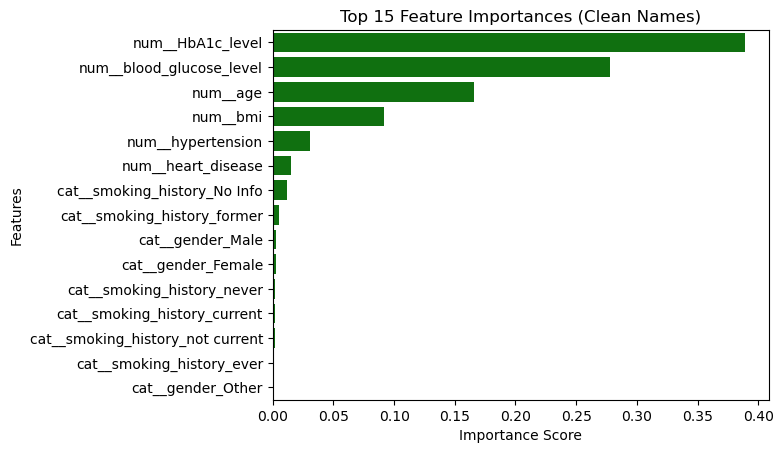

In [46]:
features_name = full_pipeline.get_feature_names_out()
feat_importance = pd.Series(forest_model.feature_importances_, index = features_name)
feat_importance = feat_importance.sort_values(ascending = False)

sns.barplot(x = feat_importance.head(15), y = feat_importance.head(15).index, color = 'green')
plt.title("Top 15 Feature Importances (Clean Names)")
plt.xlabel("Importance Score")
plt.ylabel("Features")

In [53]:
strat_test.head(15)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,age_cat
11035,Male,72.0,1,0,former,20.73,6.1,130,0,3
2048,Female,62.0,0,1,No Info,27.32,6.2,80,0,3
69437,Male,73.0,0,0,not current,27.31,6.6,160,0,4
77277,Male,70.0,0,0,No Info,27.32,3.5,85,0,3
14125,Male,67.0,0,0,current,27.32,6.6,90,0,3
63301,Female,24.0,0,0,never,21.38,4.5,126,0,2
99979,Female,61.0,0,0,current,30.11,6.2,240,1,3
92280,Female,43.0,0,0,former,44.63,6.2,80,0,3
41499,Female,38.0,0,0,No Info,20.60,4.8,200,0,3
41288,Female,80.0,0,0,No Info,27.32,5.0,90,0,4
